In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [2]:
#ruta del archivo con los datos
ruta='C:/Users/apasmino/Documents/Python Scripts/Diplomado/'

In [3]:
#nombre de las columnas
columns_name=['pk', 'sociedad', 'sector', 'ofvta', 'cod_cliente', 'nombre', 'vendedor', 'clas_fiscal', 
              'pedido', 'material', 'marca', 'linea', 'linea_o', 'id_pedido', 'costo', 'gr_mat', 'fecha',
              'fecha_2', 'ingreso', 'mesn', 'dia', 'mes', 'año', 'funica' ]

In [4]:
df=pd.read_csv(ruta+'/Query1.txt', sep=';', decimal=',', encoding = 'ISO-8859-1', names=columns_name, header=0)

In [5]:
#imprimimos las 5 primeras filas del dataframe
df.head()

,pk,sociedad,sector,ofvta,cod_cliente,nombre,vendedor,clas_fiscal,pedido,material,marca,linea,linea_o,id_pedido,costo,gr_mat,fecha,fecha_2,ingreso,mesn,dia,mes,año,funica
0,1331712,CC07,S2,G04,150230,M.O.P. DIRECCION DE VIALIDAD,ST,ZF01,CONCEPCION,150897063,VOLVO,CO,VOLVO,SA,91.94,NaN,30/10/2015,2015.10.01 00:00:00,136.54,2015-10-01,30,10,2015,201510
1,1331717,CC07,S2,G92,233597,Maquinarias y Servicios Alianza Lim,ST,ZF01,IQUIQUE,151185911,VOLVO,CO,VOLVO,SA,0.00,NaN,30/10/2015,2015.10.01 00:00:00,0.00,2015-10-01,30,10,2015,201510
2,1331699,CC07,S2,G04,71296,WTY_VOLVO BRASIL,ST,ZF01,CONCEPCION,151004930,VOLVO,CO,VOLVO,SA,0.00,NaN,19/10/2015,2015.10.01 00:00:00,0.00,2015-10-01,19,10,2015,201510
3,1331701,CC07,S2,G10,150262,M.O.P. DIRECCION DE VIALIDAD,ST,ZF01,TALCA,151014216,VOLVO,CO,VOLVO,SA,0.00,NaN,30/10/2015,2015.10.01 00:00:00,0.00,2015-10-01,30,10,2015,201510
4,1331724,CC07,S2,G14,263052,BRANDA SERVICIOS LIMITADA,ST,ZF01,SERENA,150902447,VOLVO,CO,VOLVO,SA,152.85,NaN,30/10/2015,2015.10.01 00:00:00,188.04,2015-10-01,30,10,2015,201510


In [6]:
#transformo la fecha a formato date
df['Fecha_factura']=pd.to_datetime(df['fecha'], format='%d/%m/%Y')

In [12]:
#elimino los registros con ingreso 0 en las filas (esto es un error del ERP)
df=df[df.ingreso != 0.0]

In [13]:
df2=df[['Fecha_factura', 'ingreso', 'cod_cliente']].sort_values(by='Fecha_factura')

In [14]:
df2.head()

,Fecha_factura,ingreso,cod_cliente
17340,2015-01-02,85.63,279406
16992,2015-01-02,55.54,232449
17335,2015-01-02,19.89,201399
16994,2015-01-02,49.27,232449
16995,2015-01-02,185.80,232449


In [15]:
df3=df2[df2['Fecha_factura'] < '2016-01-01']

In [19]:
df3['OrderPeriod'] = df3.Fecha_factura.apply(lambda x: x.strftime('%Y-%m'))
df3.head()

C:\Users\apasmino\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Fecha_factura,ingreso,cod_cliente,OrderPeriod
17340,2015-01-02,85.63,279406,2015-01
16992,2015-01-02,55.54,232449,2015-01
17335,2015-01-02,19.89,201399,2015-01
16994,2015-01-02,49.27,232449,2015-01
16995,2015-01-02,185.80,232449,2015-01


In [23]:
#df3.set_index('cod_cliente', inplace=True)

df3['CohortGroup'] = df3.groupby(level=0)['Fecha_factura'].min().apply(lambda x: x.strftime('%Y-%m'))
df3.reset_index(inplace=True)
df3.head()

C:\Users\apasmino\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cod_cliente,Fecha_factura,ingreso,OrderPeriod,CohortGroup
0,279406,2015-01-02,85.63,2015-01,2015-01
1,232449,2015-01-02,55.54,2015-01,2015-01
2,201399,2015-01-02,19.89,2015-01,2015-01
3,232449,2015-01-02,49.27,2015-01,2015-01
4,232449,2015-01-02,185.80,2015-01,2015-01


In [24]:
grouped = df3.groupby(['CohortGroup', 'OrderPeriod'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'cod_cliente': pd.Series.nunique,
                       'ingreso': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'cod_cliente': 'TotalUsers'
                        }, inplace=True)
cohorts.head()

TotalUsers     ingreso
CohortGroup OrderPeriod                        
2015-01     2015-01             324  1112748.50
            2015-02             177   822760.85
            2015-03             167   904934.75
            2015-04             163   952836.70
            2015-05             156   782069.82

In [25]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers     ingreso  CohortPeriod
CohortGroup OrderPeriod                                      
2015-01     2015-01             324  1112748.50             1
            2015-02             177   822760.85             2
            2015-03             167   904934.75             3
            2015-04             163   952836.70             4
            2015-05             156   782069.82             5

In [26]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2015-01    324
2015-02    162
2015-03    137
2015-04    106
2015-05     76
Name: TotalUsers, dtype: int64

In [27]:
cohorts['TotalUsers'].head()

CohortGroup  CohortPeriod
2015-01      1               324
             2               177
             3               167
             4               163
             5               156
Name: TotalUsers, dtype: int64

In [28]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
CohortPeriod,,,,,,,,,,,,
1,324.0,162.0,137.0,106.0,76.0,73.0,61.0,50.0,48.0,49.0,44.0,45.0
2,177.0,69.0,39.0,27.0,13.0,22.0,12.0,11.0,10.0,8.0,9.0,NaN
3,167.0,66.0,33.0,26.0,15.0,21.0,11.0,12.0,7.0,10.0,NaN,NaN
4,163.0,49.0,42.0,22.0,18.0,10.0,10.0,7.0,7.0,NaN,NaN,NaN
5,156.0,58.0,40.0,24.0,11.0,12.0,8.0,8.0,NaN,NaN,NaN,NaN


In [29]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
CohortPeriod,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.0
2,0.546296,0.425926,0.284672,0.254717,0.171053,0.301370,0.196721,0.22,0.208333,0.163265,0.204545,NaN
3,0.515432,0.407407,0.240876,0.245283,0.197368,0.287671,0.180328,0.24,0.145833,0.204082,NaN,NaN
4,0.503086,0.302469,0.306569,0.207547,0.236842,0.136986,0.163934,0.14,0.145833,NaN,NaN,NaN
5,0.481481,0.358025,0.291971,0.226415,0.144737,0.164384,0.131148,0.16,NaN,NaN,NaN,NaN
6,0.481481,0.395062,0.262774,0.150943,0.144737,0.109589,0.196721,NaN,NaN,NaN,NaN,NaN
7,0.496914,0.296296,0.262774,0.132075,0.157895,0.109589,NaN,NaN,NaN,NaN,NaN,NaN
8,0.475309,0.364198,0.197080,0.141509,0.118421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.469136,0.327160,0.226277,0.169811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


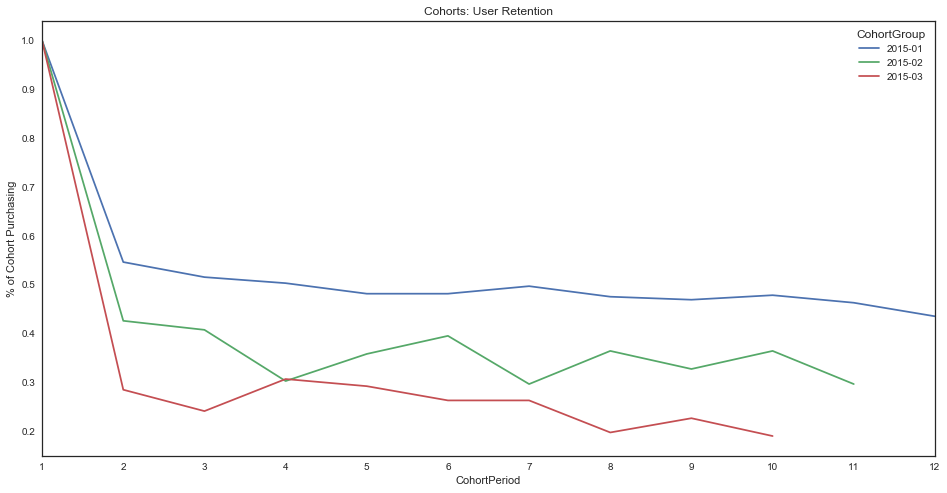

In [49]:
user_retention[['2015-01', '2015-02', '2015-03']].plot(figsize=(10,5))
#crear un gráfico y redimensionarlo
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 8)
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

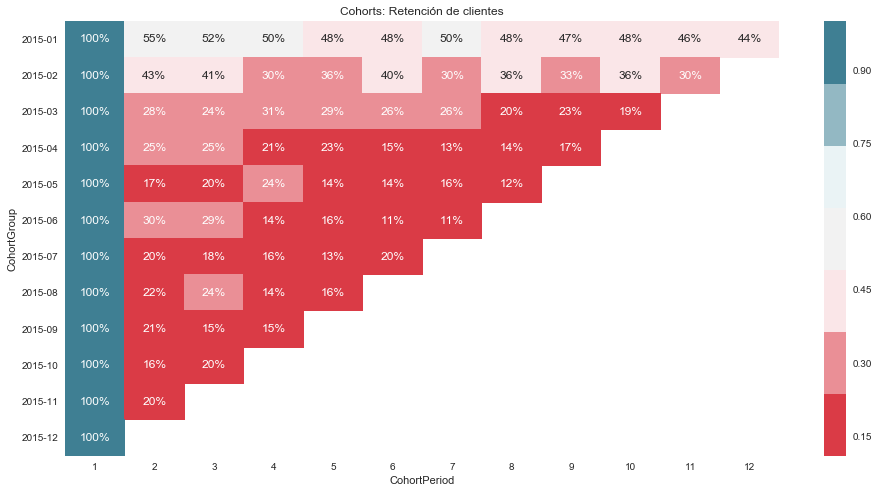

In [54]:
# Creating heatmaps in matplotlib is more difficult than it should be.
# Thankfully, Seaborn makes them easy for us.
# http://stanford.edu/~mwaskom/software/seaborn/

import seaborn as sns
sns.set(style='white')
#crear un gráfico y redimensionarlo





plt.figure(figsize=(16, 8))
plt.title('Cohorts: Retención de clientes')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%',
            cmap=sns.diverging_palette(10, 220, sep=80, n=7));